In [1]:
import pandas as pd
import re
import time
import datetime
import warnings
from wordcloud import WordCloud, STOPWORDS
from emoji import demojize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

stopwords = set(STOPWORDS)
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [2]:
def clean_text(row):
    words = []
    for w in row.split():
        word = re.sub('[^A-Za-z0-9]+', '', str(w))
        words.append(word.lower())
    return words

def get_words(df,text_label='text',target_label='is_offensive',value=0):
    words = []
    for row in df[df[target_label]==value].iloc[:][text_label]:
        words += clean_text(row)
    return ' '.join(words)    

def get_wordcloud(df,text_label='text',target_label='is_offensive',value=0):
    words = get_words(df,text_label=text_label,target_label=target_label,value=value)
    wc = WordCloud(background_color='white',
                   max_words=500,
                   stopwords=stopwords)
    wc.generate(words)
    return wc

**Filter some single word lines**

In [3]:
df = pd.read_csv("../input/d/brandonbenton/botezlive-chat-classification/botezlive_data.csv")

In [4]:
'''
filter_words = ['kekw','lul','lol','omegalul','pog',
                'kappa','sadge','lulw','monkaw','monkas',
                'd','pogu','pepega','yep','wut','catjam',
                'jebaited','pogo','yes','no','pepelaugh',
                'wutface','f','pepejam','lmao','ez',
                'waytoodank','dansgame','gg','5head',
                'pepehands','hi','clap','widepeepohappy',
                'pogchamp','notlikethis','weirdchamp',
                'pepepls','pogchamp','monkaeyes','pausechamp',
                'peepohey','poggers','forsencd','wtf','song',
                'kapp','hello','nice','true','uptime','kkomrade',
                'chess','omg','subs','rip','xd','what',
                'l','peped','wow','kkona','4head',
                'muted','hahaa','biblethump','ayaya',
                'feelsbadman','hahaha','ttours',
                'jammies','pogchamps','dream','yo',
                'time','monkahmm','angelthump','lmfao',
                'oof','o','haha','pepog','nam','bruh','ok',
                'hahahaha','me','hey','playlist','bye',
                'peepoclap','kkatjam','yeah','nope',
                'discord','modcheck','partyparrot','seemsgood',
                'heyguys','louder','fake','alienpls3','lmfaooo',
                'saved','thanks','xqcl','lmaooo','skip']
filter_words = ['ppjedi','babyrage','andrealul','raid']
for w in filter_words:
    df = df[df['text'].apply(process_text)!=w]
'''

"\nfilter_words = ['kekw','lul','lol','omegalul','pog',\n                'kappa','sadge','lulw','monkaw','monkas',\n                'd','pogu','pepega','yep','wut','catjam',\n                'jebaited','pogo','yes','no','pepelaugh',\n                'wutface','f','pepejam','lmao','ez',\n                'waytoodank','dansgame','gg','5head',\n                'pepehands','hi','clap','widepeepohappy',\n                'pogchamp','notlikethis','weirdchamp',\n                'pepepls','pogchamp','monkaeyes','pausechamp',\n                'peepohey','poggers','forsencd','wtf','song',\n                'kapp','hello','nice','true','uptime','kkomrade',\n                'chess','omg','subs','rip','xd','what',\n                'l','peped','wow','kkona','4head',\n                'muted','hahaa','biblethump','ayaya',\n                'feelsbadman','hahaha','ttours',\n                'jammies','pogchamps','dream','yo',\n                'time','monkahmm','angelthump','lmfao',\n                'oof','o

In [5]:
def process_text(text):
    return re.sub(r'[^\w\s]','',text.lower()).strip()

In [6]:
def contains_words(row,words=[]):
    text = process_text(row).split()
    return all(x in text for x in words)

In [7]:
single_word_dict = {}
for row in df['text'][:]:
    text = process_text(row)
    if len(text.split())==1:
        word = text
        if word not in single_word_dict:
            single_word_dict[word] = 1
        else: 
            single_word_dict[word] += 1

In [8]:
words = []
counts = []
for w in single_word_dict:
    words.append(w)
    counts.append(single_word_dict[w])

In [9]:
df_words = pd.DataFrame.from_dict({'word':words,'count':counts})

In [10]:
df_words.sort_values(by='count',inplace=True,axis=0,ascending=False)

<Figure size 1440x1080 with 0 Axes>

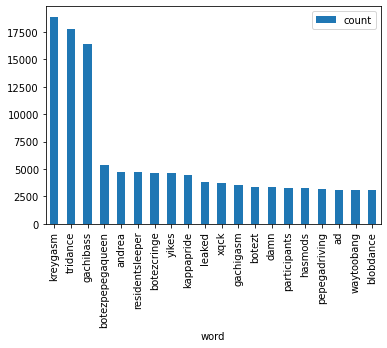

In [11]:
fig = plt.figure(figsize=(20,15))
df_words.head(20).plot(kind='bar',x='word',y='count')
plt.show()

In [12]:
pd.set_option('display.max_colwidth',None)

**Correct some misclassifications**

In [13]:
df.loc[df[(df['text'].apply(contains_words,words=['hot','sauce'])) & 
          (df['is_offensive']==1)].index]

,is_offensive,text
17187,1,hot sauce on the titty? ??????????????.


In [14]:
#df.loc[df[(df['text'].apply(contains_words,words=['hot','sauce'])) & 
#          (df['is_offensive']==1)].index[1],['is_offensive']]=0

In [15]:
df.loc[df[(df['text'].apply(contains_words,words=['hot','out'])) & 
          (df['is_offensive']==1)].index]

,is_offensive,text
788,1,"I think I figured this channel out: Come here to get your butt kicked in chess by an amazingly hot woman, and feel inferior in every way. LOL."
13624,1,Alex and qiyu looking hot today and sad that you’re out of the channel.
13635,1,Timeout Story: I once called Andrea dressed up as a boy Alex's hot brother and Gerber timed me out for 1 min. What an honor that was Kappa.
13800,1,it works out for qiyu because botez girls are hot = more views.
16525,1,"Prime GamingSadYulyeong: MODS. Botez banters more than anyone else I follow, she was on about shaving her eyebrows a while back and I jokingly said 'hot' and was timed out, use your time and energy more wisely, you're all stiffs.."
17245,1,yo why did i get timed out for saying Alex hot?.
22251,1,your mods timed me out cause I called u hot.... WTF.
24626,1,Did you just come out of the oven? Because you’re hot..
29420,1,1. Did you just come out of the oven because you’re hot.
40275,1,"We're all watching from a hot tub too, Alex is the odd one out."


In [16]:
#df.loc[df[(df['text'].apply(contains_words,words=['hot','out'])) & 
#          (df['is_offensive']==1)].index[6],['is_offensive']]=0

In [17]:
df.loc[df[(df['text'].apply(contains_words,words=['im','hot'])) & 
          (df['is_offensive']==1)].index]

,is_offensive,text
1479,1,I'm rooting for the hot girl.
1914,1,"Nas like that, hot af chess player I’m done."
4598,1,SO HOT gachiBASS JK IM NOT A PEDO WeirdChamp :raised_hand:.
6454,1,sorry im drunk i cant say a girll is hot.
9416,1,Ur so hot im busting a nut to you xqcK xqcK xqcK.
11605,1,"Botez is too hot, I can’t take it, I’m coooooming.."
12980,1,"Get these hot, half-naked girls away from me: I'm here for Chess, not Chests seqW."
14172,1,ALEX IM VERY HOT.
14173,1,Alex im hot and smart you are hot and smart too so..đ.
14249,1,ALEX IS BY A HOT GUY SO I'M IN GIRL POWER MODE.


In [18]:
df.loc[df[(df['text'].apply(contains_words,words=['sort','by','hot'])) & 
          (df['is_offensive']==1)].index]

,is_offensive,text


In [19]:
df.loc[df[(df['text'].apply(contains_words,words=['sort','by','hot'])) & 
          (df['is_offensive']==1)].index]

,is_offensive,text


In [20]:
df.loc[df[(df['text'].apply(contains_words,words=['hot','dog'])) & 
          (df['is_offensive']==1)].index]

,is_offensive,text
8192010,1,so we cant say the dog in the pouch is a hot sexy babe.


In [21]:
#df.loc[df[(df['text'].apply(contains_words,words=['hot','dog'])) & 
#          (df['is_offensive']==1)].index[1:3],'is_offensive']=0

In [22]:
df.loc[df[(df['text'].apply(contains_words,words=['hot','tub'])) & 
          (df['is_offensive']==1)].index]

,is_offensive,text
1820,1,Its crazy to think about only 10 years ago i was milking my eel to zaboomafoo on animal planet and now I own my own hot tub.
36128,1,get in the hot tub plzzzzz.
36288,1,you should do a hot tub stream to liven up the stream a bit.
36527,1,Hot tub content soon ?.
36759,1,Polish hot tub stream next.
...,...,...
7896554,1,Whens the hot tub stream?.
8093486,1,hot tub stream :O.
8125643,1,hot tub stream :O.
8157800,1,hot tub stream :O.


In [23]:
#df.loc[df[(df['text'].apply(contains_words,words=['hot','tub'])) & 
#          (df['is_offensive']==1)].index[1:5],['is_offensive']]=0

In [24]:
#df.loc[df[(df['text'].apply(contains_words,words=['hot','mic'])) & 
#          (df['is_offensive']==1)].index,['is_offensive']]=0

In [25]:
df.loc[df[(df['text'].apply(contains_words,words=['its','so','hot'])) & 
          (df['is_offensive']==1)].index]

,is_offensive,text
8239,1,Alex is so hot it's insane.
13789,1,"alexandra spealt so fast in us langage, its so hard, hot for a little french boy....."
26420,1,so this is what its like dating a hot babe Sadge.
28591,1,"Alex will have her run sooner or later, and she's been 2460's before, so she'll get back there and then it's within shouting distance and one hot streak."
8093465,1,"Alex it’s so hot, her intelligence enamora."
8125622,1,"Alex it’s so hot, her intelligence enamora."
8157779,1,"Alex it’s so hot, her intelligence enamora."


In [26]:
#df.loc[df[(df['text'].apply(contains_words,words=['its','so','hot'])) & 
#          (df['is_offensive']==1)].index[1],['is_offensive']]=0

In [27]:
df.loc[df[(df['text'].apply(process_text)=='andrea') & 
          (df['is_offensive']==1)].index,['is_offensive']]=0

In [28]:
df.loc[df[(df['text'].apply(process_text)=='alex') & 
          (df['is_offensive']==1)].index,['is_offensive']]=0

In [29]:
df.loc[df[(df['text'].apply(contains_words,words=['i','lost','xqcK'])) & 
          (df['is_offensive']==1)].index,['is_offensive']]=1

**Look at clustering approach**

In [30]:
vectorizer = TfidfVectorizer()
vectorizer.fit(df['text'])

TfidfVectorizer()

In [31]:
n_samples = 10000
n_components = 20

In [32]:
df_ones = df[df['is_offensive']==1].sample(n_samples)
df_zeros = df[df['is_offensive']==0].sample(n_samples)
df_samp = pd.concat([df_zeros,df_ones])

In [33]:
X = vectorizer.transform(df_samp['text'])
y = df_samp['is_offensive']

In [34]:
pca = TruncatedSVD(n_components=n_components)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['%s' %(i) for i in range(n_components)])
principalDf['is_offensive'] = y.values

pdf_zeros = principalDf[principalDf['is_offensive']==0]
pdf_ones = principalDf[principalDf['is_offensive']==1]

In [35]:
features = [x for x in principalDf.columns]
features.remove('is_offensive')
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(principalDf[features])
principalDf['kmean cluster'] = kmeans.labels_
df_samp['kmean cluster'] = kmeans.labels_

In [36]:
corrs = principalDf[features].corr()

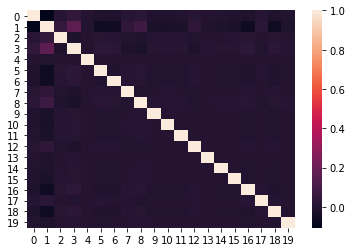

In [37]:
sns.heatmap(corrs)
plt.show()

In [38]:
corrs_df = pd.DataFrame(columns=['row','col','corr'])

for i in range(corrs.shape[0]):
    for j in range(i+1,corrs.shape[1]):
        corrs_df = corrs_df.append({'row':i,
                                    'col':j,
                                    'corr':abs(corrs.iloc[i,j])},
                                   ignore_index=True)

corrs_df.sort_values(by='corr',ascending=True,inplace=True)

In [39]:
def plot_set(labels):
    fig = plt.figure(figsize=(20,30))
    fig_num = 12#min(len(set(agg.labels_)),12)
    cols = 2
    rows = fig_num//cols
    for idx in range(fig_num):
        row_idx = int(corrs_df.iloc[idx]['row'])
        col_idx = int(corrs_df.iloc[idx]['col'])
        dims = [row_idx,col_idx,9]
        grouped_data = {}
        ax = fig.add_subplot(rows,cols,idx+1)
        for x,y,z,l in zip(principalDf[str(dims[0])],principalDf[str(dims[1])],principalDf[str(dims[2])],labels):
            if l not in grouped_data:
                grouped_data[l] = {'x':[x],'y':[y],'z':[z]}
            else:
                grouped_data[l]['x'].append(x)
                grouped_data[l]['y'].append(y)
                grouped_data[l]['z'].append(z)


        ax.set_xlabel(str(dims[0]))
        ax.set_ylabel(str(dims[1]))
        for l in grouped_data:
            plt.scatter(grouped_data[l]['x'],
                        grouped_data[l]['y'],
                        #c=l,
                        label=l)
            plt.scatter(centers[l][dims[0]],
                        centers[l][dims[1]],
                        c='black', marker='x'), 
                        #label='1st center',s=50)

#plt.xlim(-0.01,0.03)
#plt.ylim(-0.01,0.03)
        plt.title("%s,%s" %(row_idx,col_idx))
    #ax.legend()
    plt.show()

**KMeans plots**

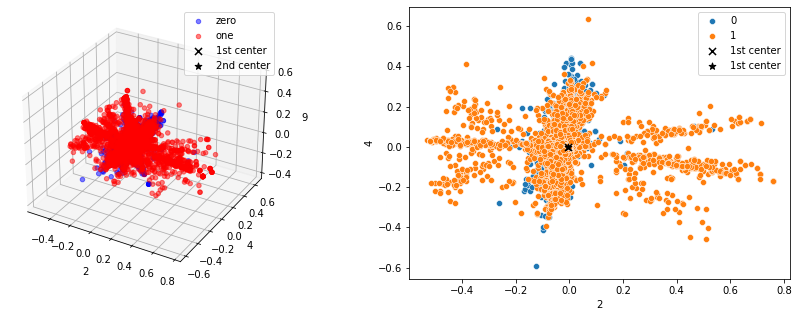

In [40]:
dims = [2,4,9]
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, projection = '3d')

ax.set_xlabel(str(dims[0]))
ax.set_ylabel(str(dims[1]))
ax.set_zlabel(str(dims[2]))

ax.scatter(pdf_zeros[str(dims[0])], pdf_zeros[str(dims[1])], pdf_zeros[str(dims[2])], c='b', label='zero',alpha=0.5)
ax.scatter(pdf_ones[str(dims[0])], pdf_ones[str(dims[1])], pdf_ones[str(dims[2])], c='r', label='one',alpha=0.5)
ax.scatter(kmeans.cluster_centers_[0][dims][0],
           kmeans.cluster_centers_[0][dims][1],
           kmeans.cluster_centers_[0][dims][2],
           c='black', marker='x', label='1st center',s=50)
ax.scatter(kmeans.cluster_centers_[1][dims][0],
           kmeans.cluster_centers_[1][dims][1],
           kmeans.cluster_centers_[1][dims][2],
           c='black', marker='*', label='2nd center',s=50)

#plt.xlim(-0.02,0.1)
#plt.ylim(-0.01,0.1)
#plt.zlim(-0.02,0.5)
ax.legend()
#plt.show()

ax = fig.add_subplot(122)
sns.scatterplot(x=str(dims[0]),y=str(dims[1]), data=pdf_zeros, label='0')
sns.scatterplot(x=str(dims[0]),y=str(dims[1]), data=pdf_ones, label='1')
plt.scatter(kmeans.cluster_centers_[0][dims][0],
            kmeans.cluster_centers_[0][dims][1],
            c='black', marker='x', label='1st center',s=50)
plt.scatter(kmeans.cluster_centers_[1][dims][0],
            kmeans.cluster_centers_[1][dims][1],
            c='black', marker='*', label='1st center',s=50)
#plt.xlim(-0.01,0.03)
#plt.ylim(-0.01,0.03)
ax.legend()
plt.show()

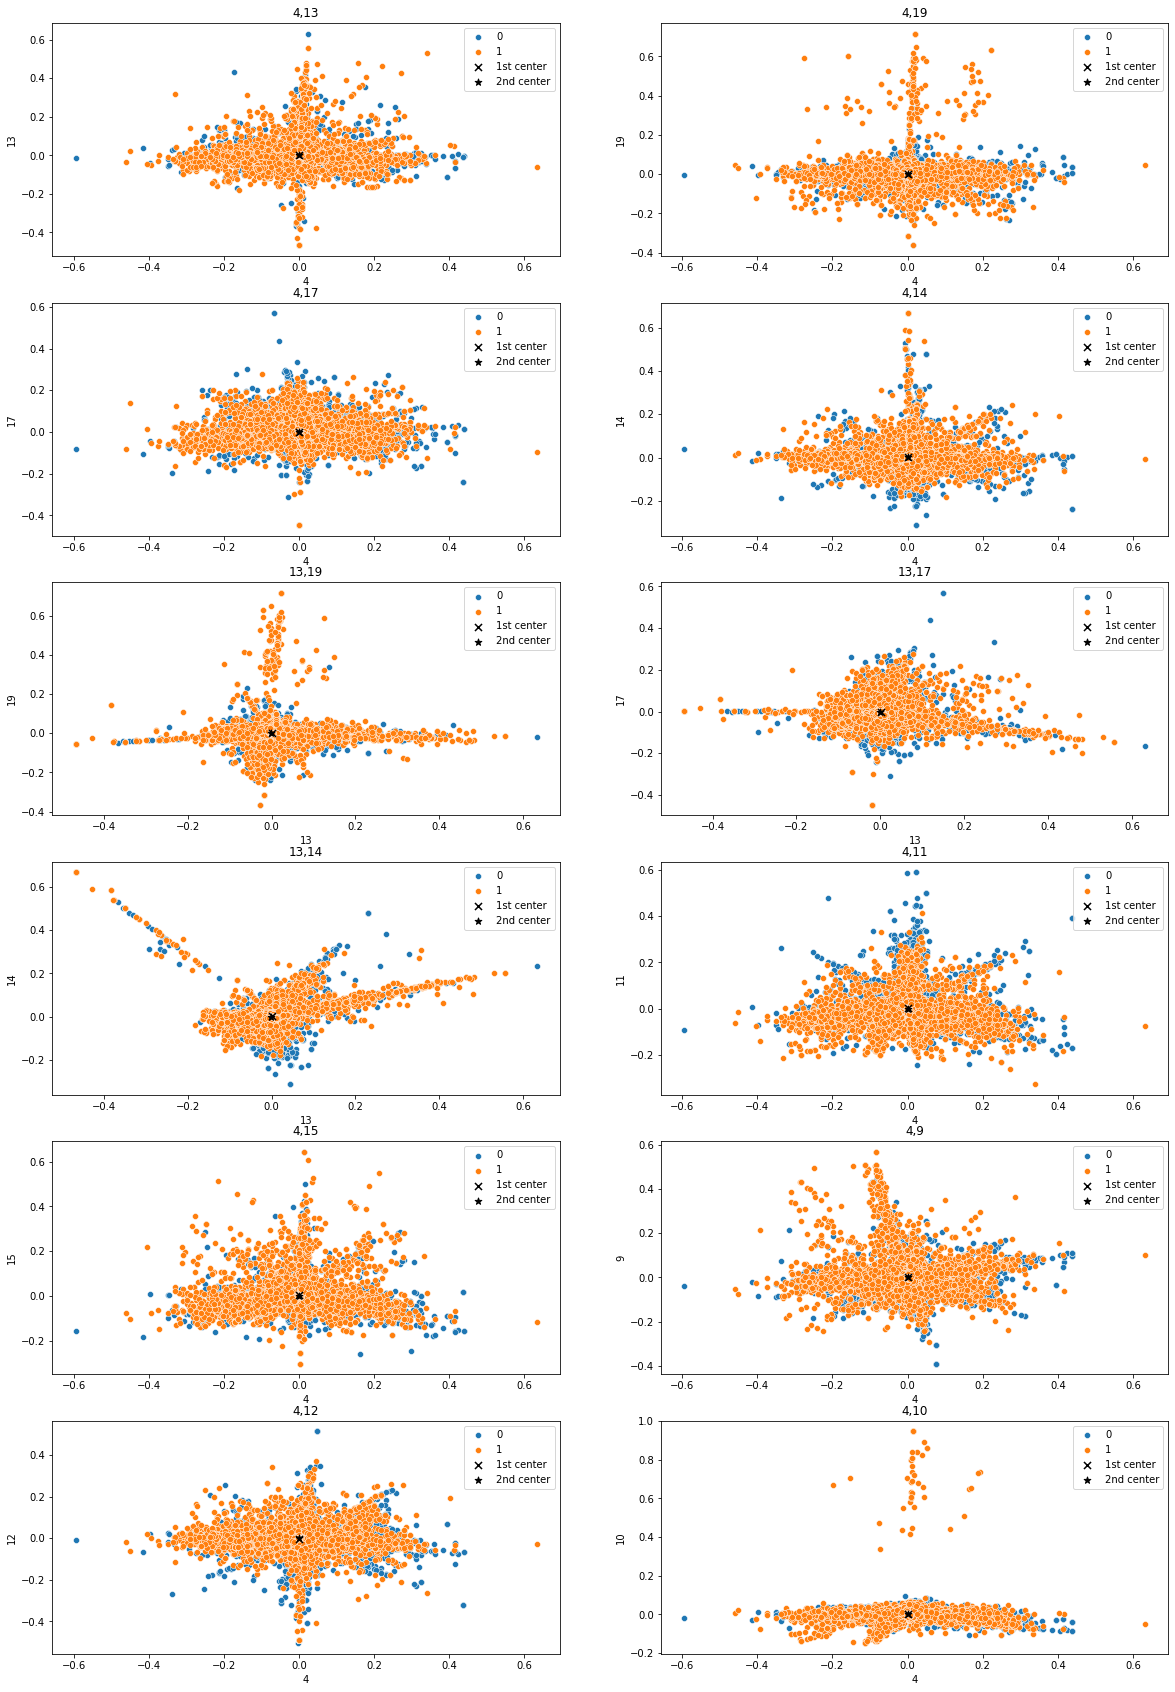

In [41]:
fig = plt.figure(figsize=(20,30))
fig_num = 12
cols = 2
rows = fig_num//cols
for idx in range(fig_num):
    row_idx = int(corrs_df.iloc[idx]['row'])
    col_idx = int(corrs_df.iloc[idx]['col'])
    dims = [row_idx,col_idx]    
    ax = fig.add_subplot(rows,cols,idx+1)
    sns.scatterplot(x=str(dims[0]),y=str(dims[1]), 
                    #data=principalDf[principalDf['kmean cluster']==0], label='0')
                    data=pdf_zeros, label='0')
    sns.scatterplot(x=str(dims[0]),y=str(dims[1]), 
                    #data=principalDf[principalDf['kmean cluster']==1], label='1')
                    data=pdf_ones, label='1')
    plt.scatter(kmeans.cluster_centers_[0][dims][0],
                kmeans.cluster_centers_[0][dims][1],
                c='black', marker='x', label='1st center',s=50)
    plt.scatter(kmeans.cluster_centers_[1][dims][0],
                kmeans.cluster_centers_[1][dims][1],
                c='black', marker='*', label='2nd center',s=50)
    #plt.xlim(-0.01,0.03)
    #plt.ylim(-0.01,0.03)
    plt.title("%s,%s" %(row_idx,col_idx))
    ax.legend()
plt.show()

In [42]:
centers = {}
for l in set([0,1]):
    centers[l] = principalDf.loc[principalDf['kmean cluster']==l,features].mean().to_list()

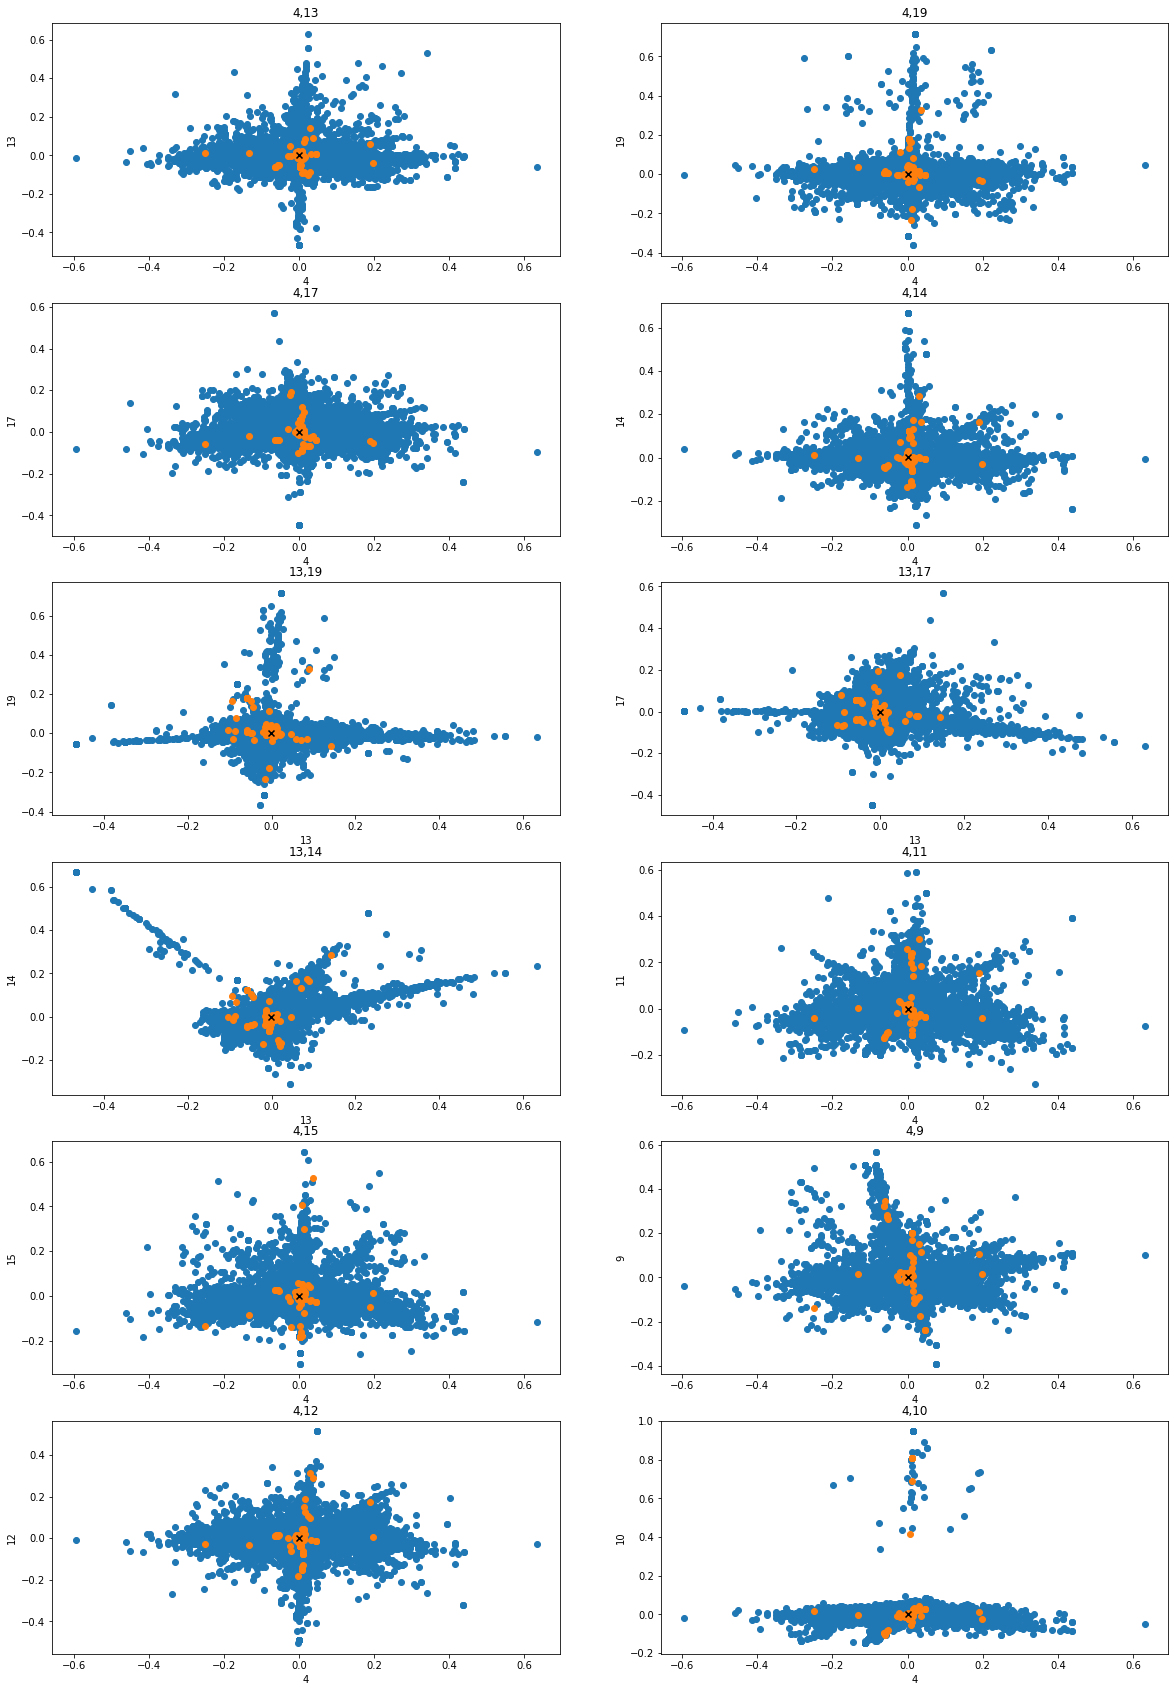

In [43]:
plot_set(kmeans.labels_)

In [44]:
dbscan = DBSCAN(eps=0.25).fit(principalDf[features])
principalDf['dbscan cluster'] = dbscan.labels_
df_samp['dbscan cluster'] = dbscan.labels_
print("dbscan label count: %s" %(len(set(dbscan.labels_))))

dbscan label count: 11


In [45]:
centers = {}
for l in set(dbscan.labels_):
    centers[l] = principalDf.loc[principalDf['dbscan cluster']==l,features].mean().to_list()

**DBSCAN plots**

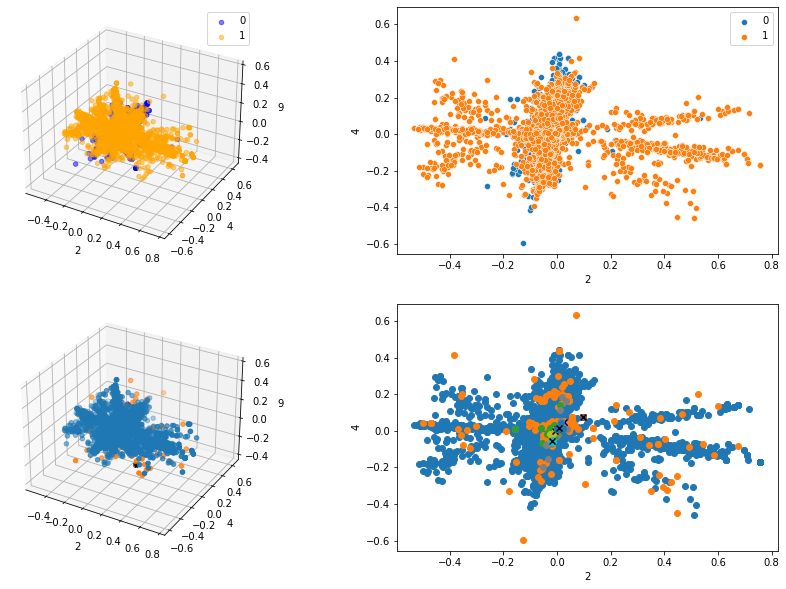

In [46]:
dims = [2,4,9]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221, projection = '3d')

ax.set_xlabel(str(dims[0]))
ax.set_ylabel(str(dims[1]))
ax.set_zlabel(str(dims[2]))

ax.scatter(pdf_zeros[str(dims[0])], pdf_zeros[str(dims[1])], pdf_zeros[str(dims[2])], c='b', label='0',alpha=0.5)
ax.scatter(pdf_ones[str(dims[0])], pdf_ones[str(dims[1])], pdf_ones[str(dims[2])], c='orange', label='1',alpha=0.5)
ax.legend()

ax = fig.add_subplot(222)
sns.scatterplot(x=str(dims[0]),y=str(dims[1]),data=pdf_zeros,label='0')
sns.scatterplot(x=str(dims[0]),y=str(dims[1]),data=pdf_ones,label='1')
plt.legend()

grouped_data = {}

ax = fig.add_subplot(223, projection = '3d')

ax.set_xlabel(str(dims[0]))
ax.set_ylabel(str(dims[1]))
ax.set_zlabel(str(dims[2]))

for x,y,z,l in zip(principalDf[str(dims[0])],principalDf[str(dims[1])],principalDf[str(dims[2])],dbscan.labels_):
    if l not in grouped_data:
        grouped_data[l] = {'x':[x],'y':[y],'z':[z]}
    else:
        grouped_data[l]['x'].append(x)
        grouped_data[l]['y'].append(y)
        grouped_data[l]['z'].append(z)

for l in grouped_data:
    ax.scatter(grouped_data[l]['x'],
               grouped_data[l]['y'],
               grouped_data[l]['z'],
               #c=l,
               label=l)

    ax.scatter(centers[l][dims[0]],
               centers[l][dims[1]],
               centers[l][dims[2]],
               c='black', marker='*')#, label='2nd center',s=50)

#plt.xlim(-0.02,0.1)
#plt.ylim(-0.01,0.1)
#plt.zlim(-0.02,0.5)
#ax.legend()
#plt.show()

ax = fig.add_subplot(224)
ax.set_xlabel(str(dims[0]))
ax.set_ylabel(str(dims[1]))
for l in grouped_data:
    plt.scatter(grouped_data[l]['x'],
                grouped_data[l]['y'],
                #c=l,
                label=l)
    plt.scatter(centers[l][dims[0]],
                centers[l][dims[1]],
                c='black', marker='x'), 
                #label='1st center',s=50)

#plt.xlim(-0.01,0.03)
#plt.ylim(-0.01,0.03)
#ax.legend()
plt.show()

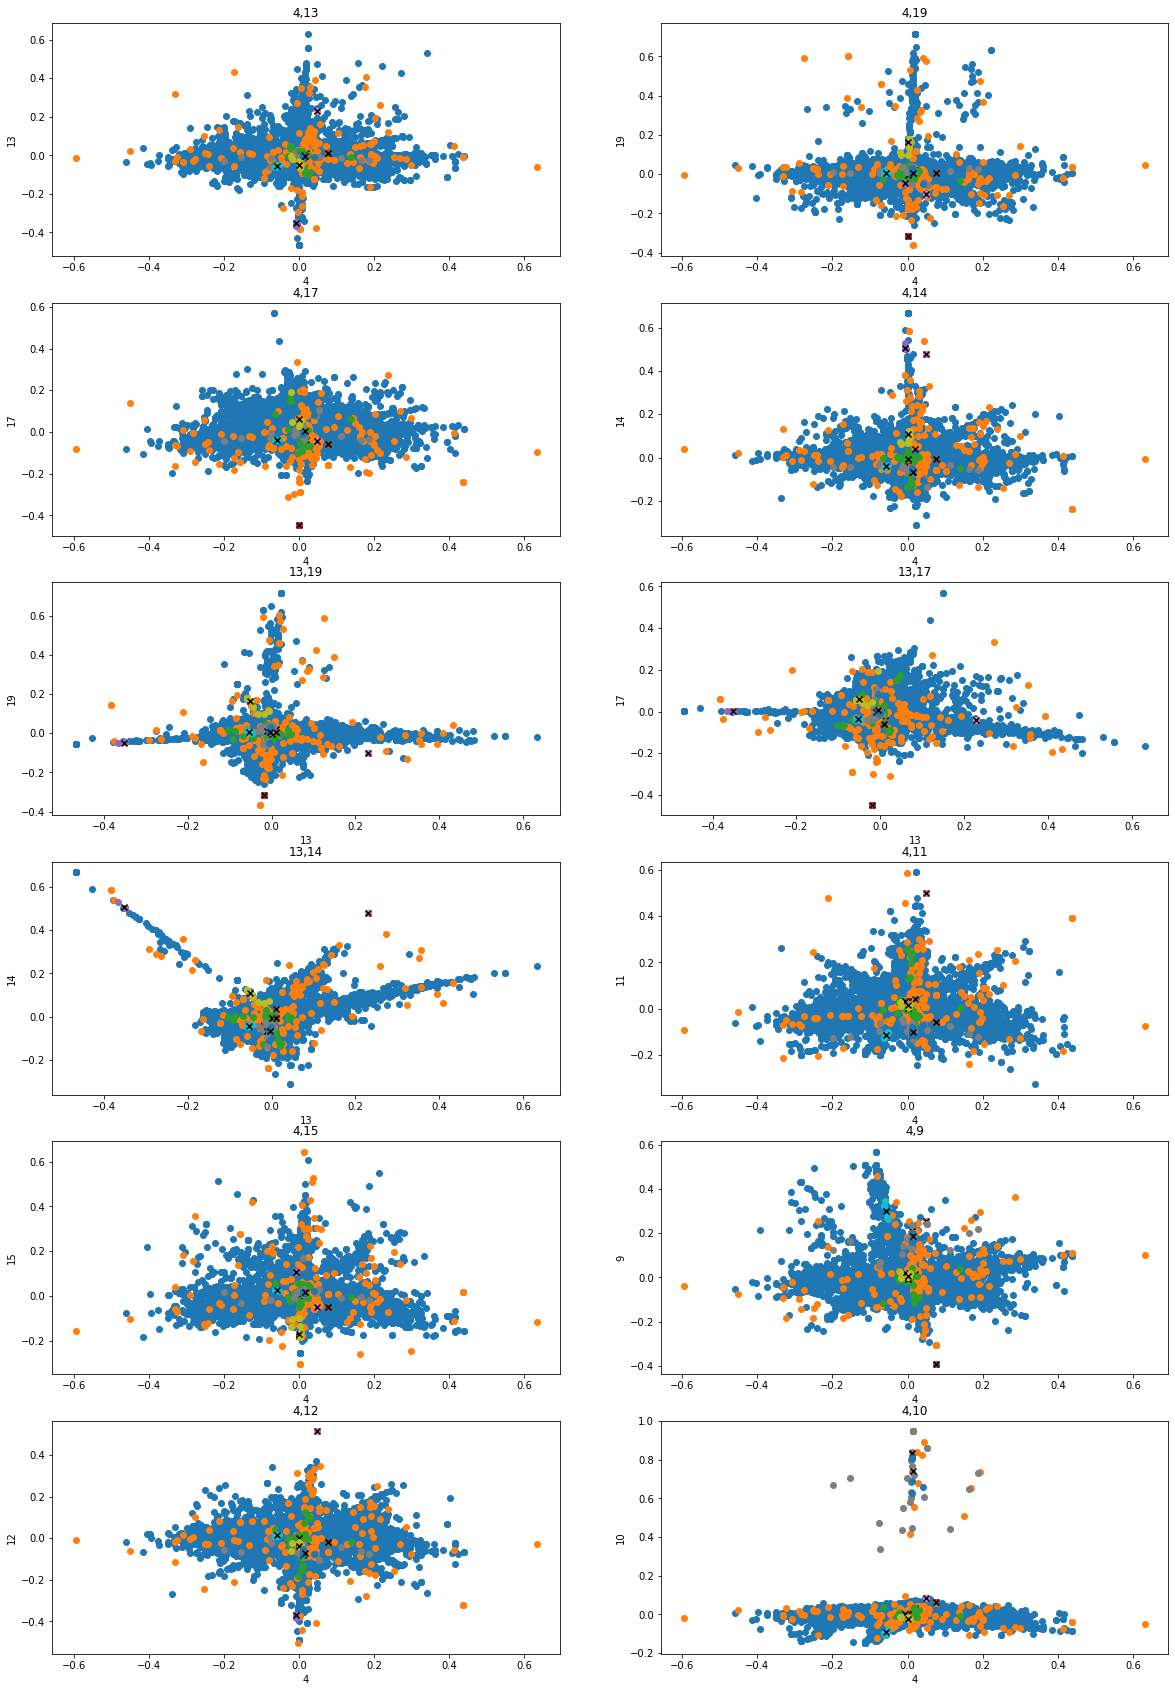

In [47]:
plot_set(dbscan.labels_)

**Word clouds for original classification**

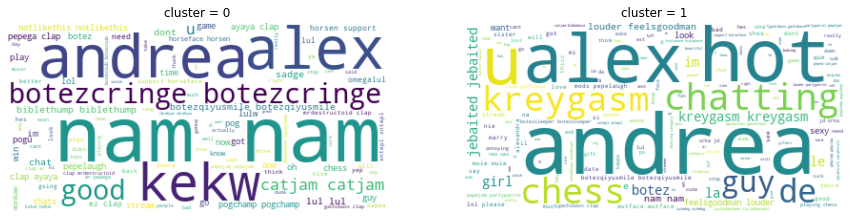

In [48]:
fig = plt.figure(figsize=(15,10))

fig.add_subplot(1,2,1)
wc = get_wordcloud(df_samp,text_label='text',target_label='is_offensive',value=0)
   #fig = plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('%s = %s' %('cluster',0))
    #plt.show()
    #return fig

fig.add_subplot(1,2,2)
wc = get_wordcloud(df_samp,text_label='text',target_label='is_offensive',value=1)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('%s = %s' %('cluster',1))
plt.show()

**Word clouds for kmean clustering with 2 clusters**

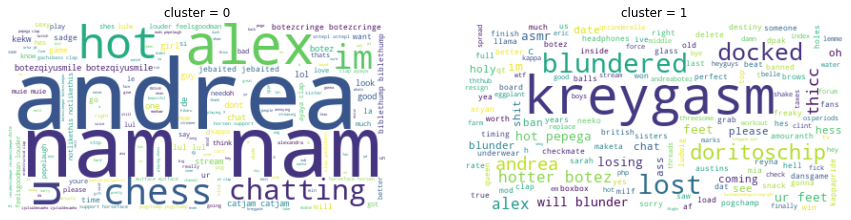

In [49]:
fig = plt.figure(figsize=(15,10))

fig.add_subplot(1,2,1)
wc = get_wordcloud(df_samp,text_label='text',target_label='kmean cluster',value=0)
   #fig = plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('%s = %s' %('cluster',0))
    #plt.show()
    #return fig

fig.add_subplot(1,2,2)
wc = get_wordcloud(df_samp,text_label='text',target_label='kmean cluster',value=1)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('%s = %s' %('cluster',1))
plt.show()

In [50]:
correct_vals = df_samp[df_samp['kmean cluster']==df_samp['is_offensive']].shape[0]
false_vals = df_samp[df_samp['kmean cluster']!=df_samp['is_offensive']].shape[0]
accuracy = correct_vals/(correct_vals+false_vals)
accuracy

0.515

In [51]:
labels = list(set(dbscan.labels_))
subplot_number = len(labels)

In [52]:
label_accuracy_df = pd.DataFrame(columns=['label','score'])
matches = df_samp[(df_samp['dbscan cluster']==0) & (df_samp['is_offensive']==0)].shape[0]
total = df_samp[df_samp['is_offensive']==0].shape[0]
label_accuracy_df = label_accuracy_df.append({'label':0,'score':matches/total},ignore_index=True)

In [53]:
for l in labels[1:]:
    matches = df_samp[(df_samp['dbscan cluster']==l) & (df_samp['is_offensive']==1)].shape[0]
    total = df_samp[df_samp['dbscan cluster']==l].shape[0]
    label_accuracy_df = label_accuracy_df.append({'label':l,'score':matches/total},ignore_index=True)

In [54]:
label_accuracy_df.sort_values(by='score',ascending=False,inplace=True)

**Word clouds for dbscan clustering**

dbscan label count: 11


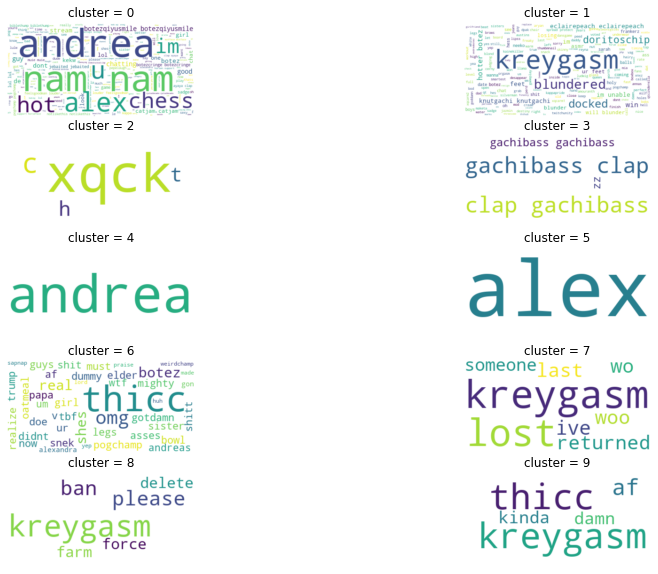

In [55]:
fig = plt.figure(figsize=(15,10))
labels = list(set(dbscan.labels_))
print("dbscan label count: %s" %len(labels))
subplot_number = min(20,len(labels))
cols = 2
rows = subplot_number//cols

for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    try:
        wc = get_wordcloud(df_samp,text_label='text',target_label='dbscan cluster',value=labels[i])
   #fig = plt.figure(figsize=(10,5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title('%s = %s' %('cluster',labels[i]))
    except:
        pass
    
plt.show()

In [56]:
df_samp[df_samp['dbscan cluster']==0]

,is_offensive,text,kmean cluster,dbscan cluster
7497277,0,OMEGIES.,0,0
1038763,0,D: S.,0,0
4292364,0,I thought it was funny.,0,0
7092102,0,eddaniLove.,0,0
5498436,0,!compare.,0,0
...,...,...,...,...
8417,1,i think u hot.,0,0
46607,1,Vă place? Care este pretul?,0,0
40728,1,HA LOOK IT THE NICE BEST TWO WOMAN ON TWITCH YEA HELLO GIRLS HOW ARE YOU TWO TO NIGHT GOOD YEA SEXY YOU KNOW YOU ARE YOO.,0,0
7406,1,https://open.spotify.com/track/05l55Q5FpHrMs06JoYcmrR?si=8dQZQC3CQ8CuwYKcgef5vg.,0,0


**Agglomerative clustering**

In [57]:
agg = AgglomerativeClustering()
agg.fit(principalDf[features])
principalDf['agg cluster'] = agg.labels_
df_samp['agg cluster'] = agg.labels_
print("agg label count: %s" %(len(set(agg.labels_))))

agg label count: 2


In [58]:
centers = {}
for l in set(agg.labels_):
    centers[l] = principalDf.loc[principalDf['agg cluster']==l,features].mean().to_list()

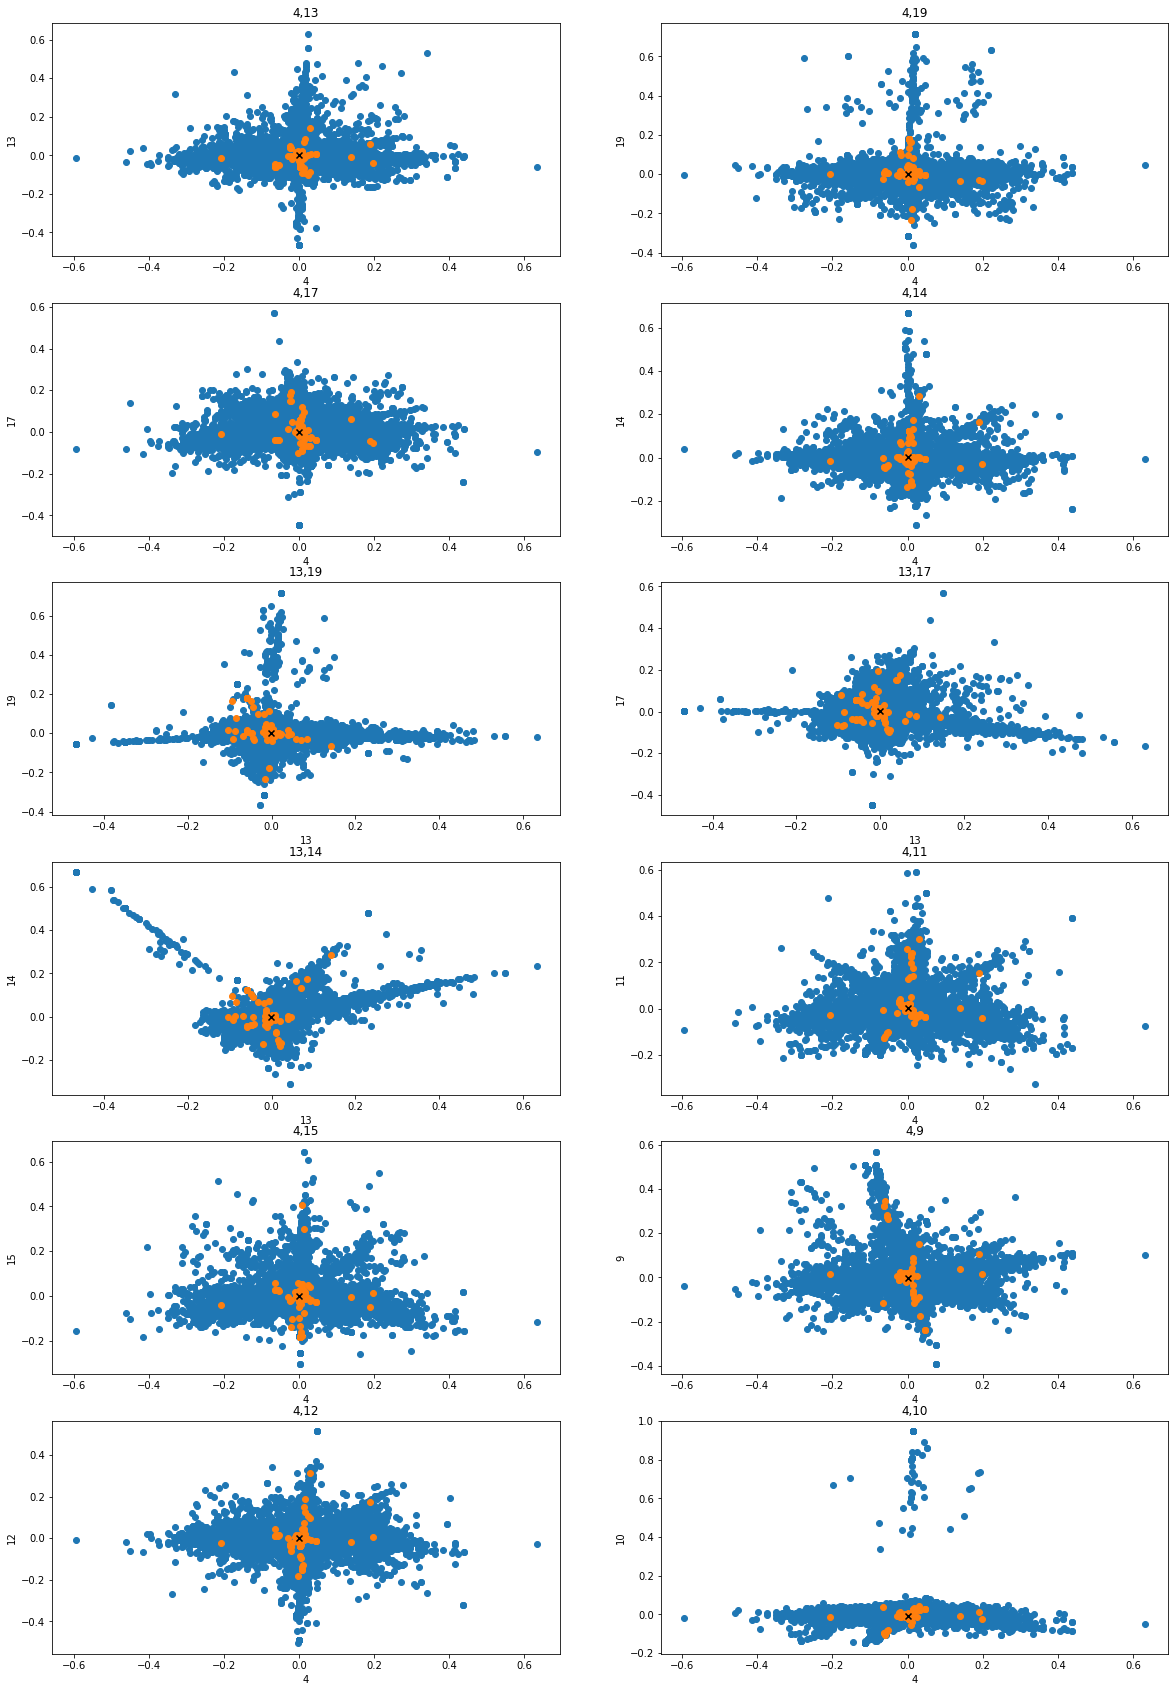

In [59]:
plot_set(agg.labels_)

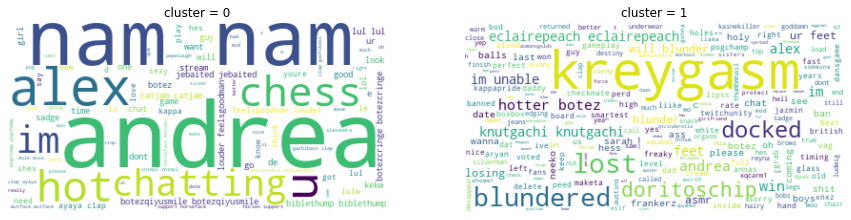

In [60]:
fig = plt.figure(figsize=(15,10))
labels = list(set(agg.labels_))
subplot_number = min(20,len(labels))
cols = 2
rows = subplot_number//cols

for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    #try:
    wc = get_wordcloud(df_samp,text_label='text',target_label='agg cluster',value=labels[i])
   #fig = plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('%s = %s' %('cluster',labels[i]))
    #except:
     #   pass
    
plt.show()

In [61]:
correct_vals = df_samp[df_samp['agg cluster']==df_samp['is_offensive']].shape[0]
false_vals = df_samp[df_samp['agg cluster']!=df_samp['is_offensive']].shape[0]
accuracy = correct_vals/(correct_vals+false_vals)
accuracy

0.5162